In [1]:
from epi_model import *

In [2]:
tnet = temporalNetwork.load('high school')

In [3]:
# for those not relying on contact, the situation is easier
N = 3600*24 / 20
B = 1 - np.power( 1 - 0.09, 1/N )
B

2.1830937505185055e-05

In [4]:
mean_rec = 3600*24*20 / 20

# daily

In [5]:
p = dict(params.covid_estimate)

In [6]:
sim = SEIR_daily(tnet, p)

In [7]:
sim.init_attributes()
for i in range(30):
    sim.state_change(i, 'inf')
sim.run(100)

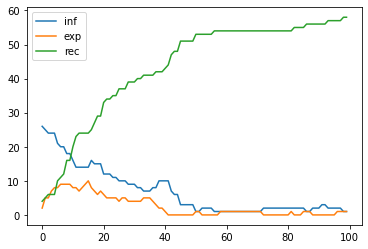

In [8]:
plt.plot(sim.meas['inf'], label='inf')
plt.plot(sim.meas['exp'], label='exp')
plt.plot(sim.meas['rec'], label='rec')
plt.legend();

# dense

In [9]:
sim = simulations.SEIR(tnet, p)

In [10]:
sim.init_attributes()
for i in range(30):
    sim.state_change(i, 'inf')
sim.run(100)

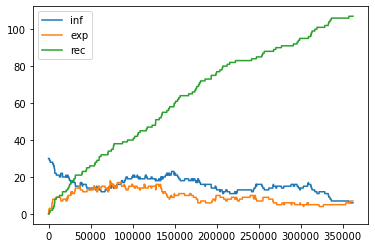

In [11]:
plt.plot(sim.meas['inf'], label='inf')
plt.plot(sim.meas['exp'], label='exp')
plt.plot(sim.meas['rec'], label='rec')
plt.legend();

# compare larger sample...

In [12]:
sim_typ.__name__

NameError: name 'sim_typ' is not defined

In [ ]:
measdb = defaultdict(list)

for sim_typ in [simulations.SEIR, simulations.SEIR_daily]:
    print('running', sim_typ.__name__)
    
    sim = sim_typ(tnet, 6e-04, 1/mean_rec, e2i=B)
    
    for i in range(100):
        if (i+1) % 20 == 0:
            print("on sim number", i+1)
        
        sim.init_attributes()
        for j in range(30):
            sim.state_change(j, 'inf')
        sim.run(20)
        
        measdb[sim_typ.__name__].append( { k:sim.meas[k][-1] for k in sorted(sim.meas) } )